<a href="https://colab.research.google.com/github/KDev-Huh/Deep_learning/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80_%EB%8B%A8%EC%9D%BC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사이킷런 datasets에서 load_breast_cancer 함수로 Bunch 클래스의 객체 가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
# 입력데이터 확인
print(cancer.data.shape, cancer.target.shape)
cancer.data[:3]

(569, 30) (569,)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

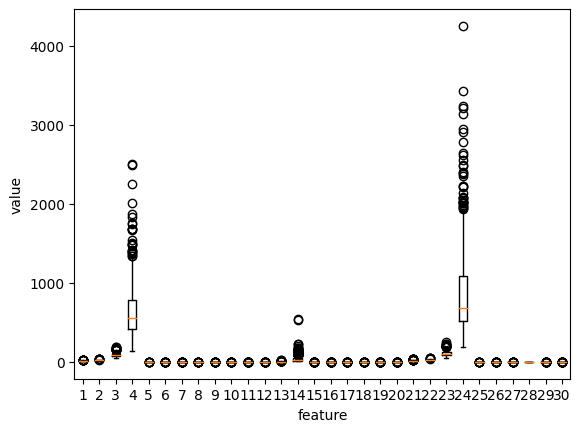

In [ ]:
# 박스 플롯으로 특성의 사분위 그리기
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
# 눈에 띄는 특성 살펴보기
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
# 타깃 데이터 확인
np.unique(cancer.target, return_counts = True)

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

In [ ]:
# 훈련데이터 세트 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.2, random_state=42)
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [ ]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses=[]

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 정방향 계산
    return  z

  def backprop(self, x, err):
    w_grad = x * err    # 가중치 업데이트
    b_grad = 1 * err    # 절편 업데이트
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])    # 가중치 초기화
    self.b = 0      # 절편 초기화
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))   # 인덱스 섞기
      for i in indexes:           # 모든 샘플에 대해 반복
        z = self.forpass(x[i])    # 정방향 계산
        a = self.activation(z)    # 활성화 함수 적용
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)

        loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))
      self.losses.append(loss/len(y))

  def activation(self, z):
    z = np.clip(z, -100, None)  # 안전한 np.exp() 계산을 위해
    a = 1 / (1 + np.exp(-z))    # 시그모이드 계산
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형 함수 적용
    return np.array(z) > 0        # z가 0보다 크면 시그모이드 함수의 출력값은 0.5보다 크고 z가 0 보다 작으면 시그모이드 함수 출력값도 0.5보다 작다.

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.8859649122807017

<h1>이 코드에서는 높은 정확도를 가지는 이유는 훈련 샘플을 epoch마다 무작위로 섞었기 때문이다.</h1>
<p>layer객체의 losses 속성에 손실함수의 결과값을 출력하여 확인 해보기</p>

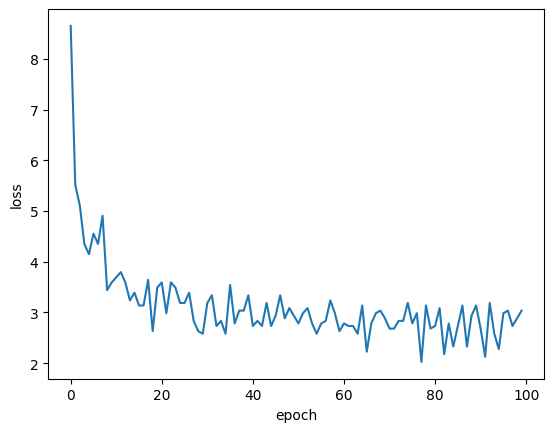

In [ ]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

<h1>사이킷런으로 로지스틱 회귀를 수행하기</h1>
<h3>지금까지 우리는 직접 선형회귀, 로지스틱 회귀 등 신경망 알고리즘들을 직접 구현해보았다. 이번에는 사이킷런에 있는 SGDClassifier 클래스를 사용하여 로지스틱 회귀를 수행해보자</h3>

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)

In [ ]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
result = sgd.predict(x_test[0:10])
total = 0
for y_i, result_i in zip(y_test[0:10], result):
  print(f'실제 y값 : {y_i} sgd의 예측값 : {result_i}')
  if y_i == result_i:
    total+=1
print(f'정확도 : {total/len(result)*100}%')

실제 y값 : 0 sgd의 예측값 : 0
실제 y값 : 1 sgd의 예측값 : 1
실제 y값 : 0 sgd의 예측값 : 0
실제 y값 : 1 sgd의 예측값 : 0
실제 y값 : 0 sgd의 예측값 : 0
실제 y값 : 1 sgd의 예측값 : 0
실제 y값 : 1 sgd의 예측값 : 1
실제 y값 : 0 sgd의 예측값 : 0
실제 y값 : 0 sgd의 예측값 : 0
실제 y값 : 0 sgd의 예측값 : 0
정확도 : 80.0%
